In [6]:
##Dependencies 
import pandas as pd 
import matplotlib.pyplot as plt
from scipy import stats as sts
from scipy.interpolate import interp1d
import numpy as np
import matplotlib as mpl
import seaborn as sns

In [7]:
bcorp_US_cleaned= pd.read_csv('bcorp_US_cleaned.csv')
bcorp_US_cleaned.head()

,Unnamed: 0,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle
0,1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,10.0,NaN,1
1,2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,7.9,0.0,2
2,9,Bark Media,7/25/2018,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,12.7,NaN,1
3,10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,14.1,NaN,1
4,11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,5.4,NaN,2


## Assessing relative impact of each impact area on the overall score

#### Relative impact of  "Community" Impact Area on Overall Score

In [8]:
##Run linear regression on Community impact area on overall score
(s, i, rcom, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
rcom
#r squared output tells us community impact area explains approximately 38% of the variation in overall score
regress_values_community = bcorp_US_cleaned.impact_area_community * s + i
line_eq_comm = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_comm

'y = 0.44x + 84.38'

#### Community Impact Area vs. Overall Score Scatterplot

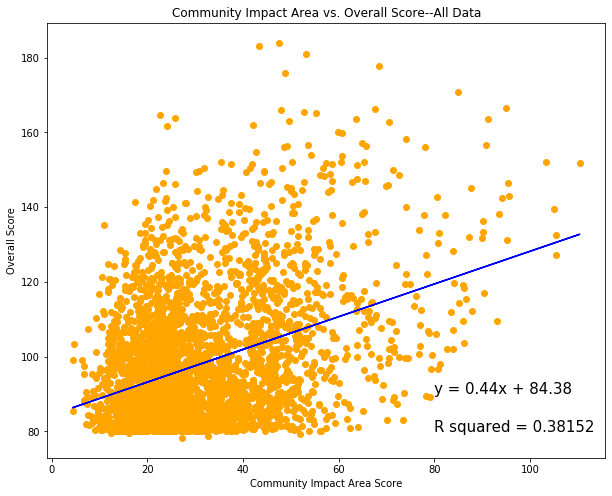

In [9]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score, color = 'orange')
plt.plot(bcorp_US_cleaned.impact_area_community, regress_values_community, "b-")
plt.annotate("R squared = "+str(round(rcom,5)), (80,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_comm, (80, 90), fontsize = 15, color = 'black')
plt.title("Community Impact Area vs. Overall Score--All Data")
plt.xlabel("Community Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("community_ia_vs_overall.png")

####  Relative Impact of "Governance" Impact Area on Overall Score

In [10]:
##Governance linregress
(s, i, rg, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
rg
regress_values_gov = bcorp_US_cleaned.impact_area_governance * s + i
line_eq_gov = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_gov

'y = 0.97x + 84.99'

#### Governance Impact Area vs. Overall Score Scatterplot

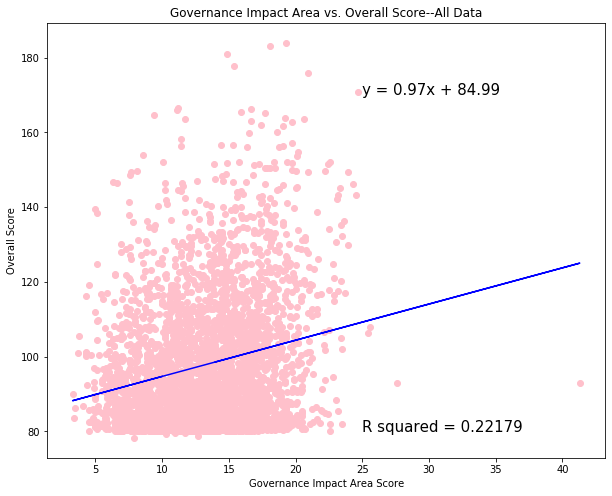

In [11]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score, color = 'pink')
plt.plot(bcorp_US_cleaned.impact_area_governance, regress_values_gov, "b-")
plt.annotate("R squared = "+str(round(rg,5)), (25,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_gov, (25, 170), fontsize = 15, color = 'black')
plt.title("Governance Impact Area vs. Overall Score--All Data")
plt.xlabel("Governance Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("governance_ia_vs_overall.png")

#### Relative impact of "Environment" Impact Area on Overall Score

In [12]:
##Environment linregress
(s, i, re, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_environment, bcorp_US_cleaned.overall_score)
re
regress_values_env = bcorp_US_cleaned.impact_area_environment * s + i
line_eq_env = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
line_eq_env

'y = 0.19x + 94.38'

#### Environment Impact Area vs. Overall Score Scatterplot

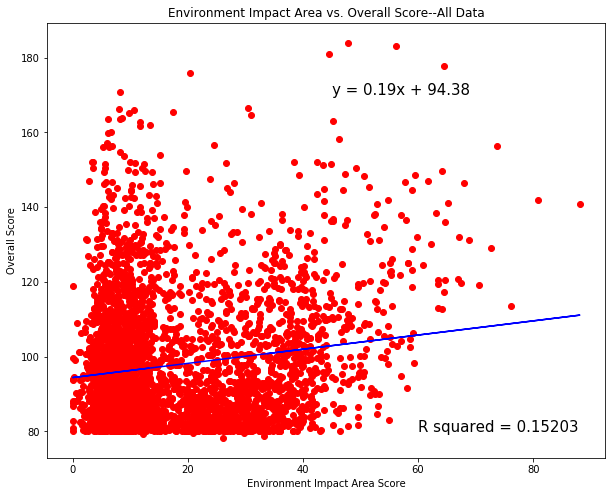

In [13]:
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned.impact_area_environment, bcorp_US_cleaned.overall_score, color = 'red')
plt.plot(bcorp_US_cleaned.impact_area_environment, regress_values_env, "b-")
plt.annotate("R squared = "+str(round(re, 5)), (60,80), fontsize = 15, color = 'black')
plt.annotate(line_eq_env, (45, 170), fontsize = 15, color = 'black')
plt.title("Environment Impact Area vs. Overall Score--All Data")
plt.xlabel("Environment Impact Area Score")
plt.ylabel("Overall Score")
plt.savefig("environment_ia_vs_overall.png")

#### Relative Impact of "Workers" Impact Area on Overall Score

In [15]:
##Workers linregress
# (s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
# r
# regress_values_work = bcorp_US_cleaned.impact_area_workers * s + i
# line_eq_work = "y = " + str(round(s,2)) + "x + " + str(round(i,2))
workers_array = bcorp_US_cleaned.impact_area_workers.to_numpy(dtype = int)
nan_array_work = np.isnan(workers_array)
not_nan_array_work = ~ nan_array_work
workers_nonan = workers_array[not_nan_array_work]
workers_nonan
(slope, intercept, rvaluew, pvalue, stderr) = sts.linregress(workers_nonan, overallscore_array)
rvaluew

##Workers linregress
regress_values_workers = workers_nonan * s + i
line_eq_work = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_work

NameError: name 'overallscore_array' is not defined

#### Workers Impact Area vs. Overall Score Scatterplot

NameError: name 'regress_values_workers' is not defined

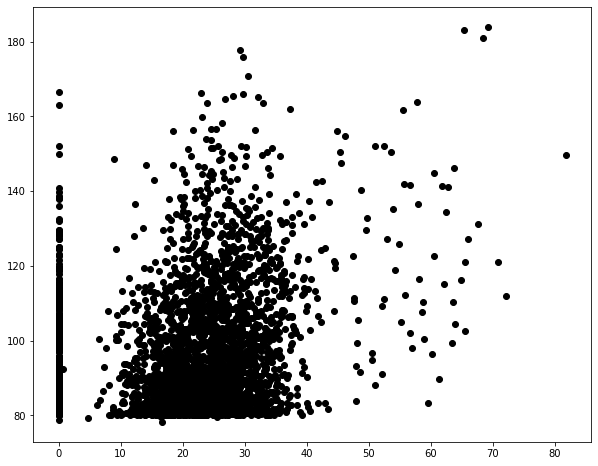

In [16]:
#This code is buggy and putting out a weird graph. Originally the code ran fine in the scratch notebook and outputted the graph in the readme. Identical code. New bugs. Shrug. 
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned['impact_area_workers'], bcorp_US_cleaned['overall_score'], color = 'black')
plt.plot(bcorp_US_cleaned.impact_area_workers, regress_values_workers, "r-")
plt.annotate(line_eq_work,(35,170),fontsize=15,color="red")
plt.annotate("R squared = " + str(round(rvaluew, 5)), (55, 80), fontsize = 15, color = "black" )
plt.title("Workers Impact Area vs. Overall Score--All Data")
plt.xlabel("Workers Impact Area Score")
plt.ylabel("Overall Impact Score")
plt.savefig("worker_ia_vs_overall.png")

#### Relative Impact of "Customers" Impact Area on Overall Score

In [17]:
#Filter out NaNs from impact area customers series, run regression with it as np array
customers_array = bcorp_US_cleaned['impact_area_customers'].to_numpy(dtype = int)
customers_array
overallscore_array = bcorp_US_cleaned['overall_score'].to_numpy(dtype = int)
overallscore_array
nan_array_cust = np.isnan(customers_array)
not_nan_array_cust = ~ nan_array_cust
customers_nonan = customers_array[not_nan_array_cust]
customers_nonan 
#attempt regression 
(slope, intercept, rvalue, pvalue, stderr) = sts.linregress(customers_nonan, overallscore_array)
rvalue 
regress_values_customers = customers_nonan * slope + intercept
line_eq_customers = "y = " + str(slope) + "x + " + str(round(intercept,2))
line_eq_customers

'y = 2.4508119318628242e-09x + 97.61'

#### Customers Impact Area vs. Overall Score--Scatter plot w/linear regression plotted on top. 

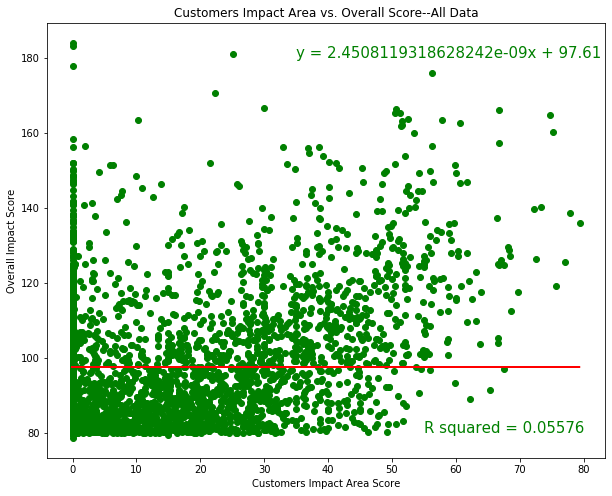

In [18]:
#This code is buggy and putting out a weird graph. Originally the code ran fine in the scratch notebook and outputted the graph in the readme. Identical code. New bugs. Shrug. 
plt.figure(figsize = (10,8))
plt.scatter(bcorp_US_cleaned['impact_area_customers'], bcorp_US_cleaned['overall_score'], color = 'green')
plt.plot(bcorp_US_cleaned.impact_area_customers, regress_values_customers, "r-")
plt.annotate(line_eq_customers,(35,180),fontsize=15,color="green")
plt.annotate("R squared = " + str(round(rvalue, 5)), (55, 80), fontsize = 15, color = "green" )
plt.title("Customers Impact Area vs. Overall Score--All Data")
plt.xlabel("Customers Impact Area Score")
plt.ylabel("Overall Impact Score")
plt.savefig("customer_ia_vs_overall.png")

#### Running correlation between all 5 impact areas and overall score

In [19]:
#Put only impact areas into separate df for correlation
impact_correlation = bcorp_US_cleaned.corr(method = 'pearson')
impact_correlation = impact_correlation.drop(labels = 'certification_cycle', axis = 1)
impact_correlation = impact_correlation.drop(labels = 'assessment_year', axis = 1)
impact_correlation_trimmed = impact_correlation.drop([col for col in impact_correlation.columns if 'impact_area' in col],axis=1)
impact_correlation_trimmed = impact_correlation_trimmed.drop(labels = 'firstcertyear', axis = 1)
impact_correlation_trimmed

KeyError: "['firstcertyear'] not found in axis"

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/scorebycycle_line.png'

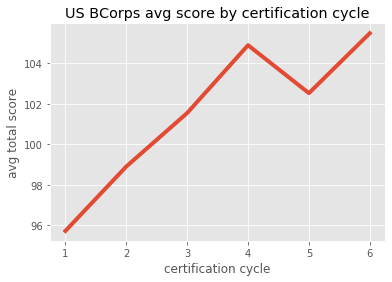

In [20]:
# Does a company’s impact score improve or worsen over the course of their tenure of certification? 
# (given that recertification is a 3 year cycle). 
avg_score=bcorp_US_cleaned.groupby('certification_cycle').mean()['overall_score']
avg_score=pd.DataFrame(avg_score)
avg_score

plt.style.use('ggplot')
plt.xlabel('certification cycle')
plt.ylabel('avg total score')
plt.title('US BCorps avg score by certification cycle')
plt.plot(avg_score, linewidth=4, markersize=10)
plt.savefig('graphs/scorebycycle_line.png')

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/avgscorebyyear_line.png'

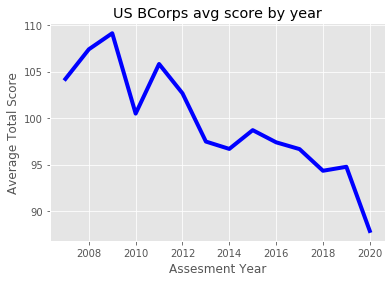

In [21]:
## Graph average impact score by year
bcorp_US_cleaned.groupby(['assessment_year']).mean()['overall_score'].plot(linewidth=4, color="blue")

plt.style.use('ggplot')
plt.xlabel('Assesment Year')
plt.ylabel('Average Total Score')
plt.title('US BCorps avg score by year')
plt.savefig('graphs/avgscorebyyear_line.png')
plt.show()

In [22]:
#Find when each B Corp was first certified 
bcorp_US_cleaned['date_first_certified'] = pd.to_datetime(bcorp_US_cleaned['date_first_certified'], errors='coerce')
bcorp_US_cleaned['firstcertyear'] = bcorp_US_cleaned['date_first_certified'].dt.year
bcorp_US_cleaned.head()

,Unnamed: 0,company_name,date_first_certified,date_certified,current_status,sector,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,certification_cycle,firstcertyear
0,1,Heather Paulsen Consulting,2015-12-30,12/19/2017,certified,Service with Minor Environmental Footprint,2017,115.0,51.8,40.0,13.2,10.0,NaN,1,2015
1,2,Heather Paulsen Consulting,2015-12-30,12/30/2015,certified,Service with Minor Environmental Footprint,2015,90.5,34.3,40.0,8.1,7.9,0.0,2,2015
2,9,Bark Media,2018-07-25,7/25/2018,certified,Service with Minor Environmental Footprint,2018,90.5,49.7,20.3,7.7,12.7,NaN,1,2018
3,10,Kosmenko & Co.,2016-08-30,11/7/2019,certified,Service with Minor Environmental Footprint,2019,120.3,49.1,43.3,13.6,14.1,NaN,1,2016
4,11,Kosmenko & Co.,2016-08-30,8/30/2016,certified,Service with Minor Environmental Footprint,2016,116.7,56.5,37.5,17.3,5.4,NaN,2,2016


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/certificationsperyear.png'

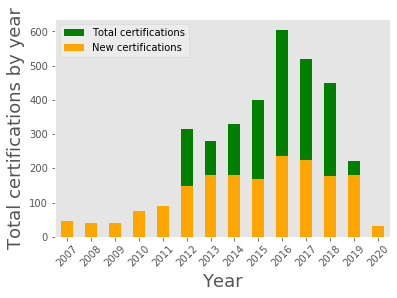

In [23]:
#Graph total certifications by year 
assesyr = bcorp_US_cleaned.groupby(['assessment_year'])['company_name'].count()
newcerts=bcorp_US_cleaned.groupby(['firstcertyear'])['company_name'].nunique()


fig, ax1 = plt.subplots()

# assesyr.plot(kind='bar')
plt.style.use('bmh')
assesyr.plot(kind='bar', color='green', label='Total certifications')
ax2 = ax1
newcerts.plot(kind='bar', color='orange', label='New certifications')
ax2.grid(b=False)
plt.ylabel("Total certifications by year", fontsize=18)
plt.xlabel('Year', fontsize=18)
plt.legend()
plt.xticks(rotation=45)
plt.savefig('graphs/certificationsperyear.png')

plt.show()

In [24]:
#Find unique sectors
bcorp_US_cleaned.sector.unique()

array(['Service with Minor Environmental Footprint', 'Wholesale/Retail',
       'Service with Significant Environmental Footprint',
       'Manufacturing', 'Agriculture/Growers', 'Service'], dtype=object)

In [25]:
#Calculate standard error of overall score for error bars
from scipy.stats import sem
sem = sem(bcorp_US_cleaned.overall_score)
sem

0.29602680236164886

C:\Users\diamo\anaconda3.7\lib\site-packages\numpy\core\_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\diamo\anaconda3.7\lib\site-packages\numpy\core\_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
C:\Users\diamo\anaconda3.7\lib\site-packages\numpy\core\_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


FileNotFoundError: [Errno 2] No such file or directory: 'graphs/avgscorebysector_barh.png'

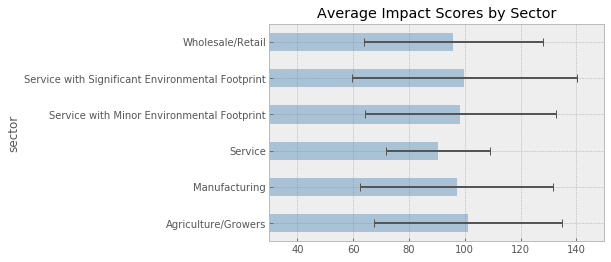

In [26]:
#Plot average score by impact area with error bars
def double_std(array):
 return np.std(array) * 2
import scipy.stats as sp 

by_sectors=bcorp_US_cleaned.groupby('sector').agg([np.mean, double_std, sp.sem])
sector_avgs=by_sectors["overall_score"]

# sector_avgs

sector_avgs.plot(kind = "barh", y = "mean", legend = False, title = "Average Impact Scores by Sector",
                 xerr = "double_std", linewidth = 1.5, color = "steelblue", alpha = 0.4, capsize = 4)
plt.xlim((30,150))
plt.savefig('graphs/avgscorebysector_barh.png')
# sector_avgs.plot(kind = "bar", y = "mean", legend = False, title = "Average Avocado Prices", )

In [27]:
#Make groups for ANOVA to test for differences in Impact score between groups
group1 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service with Minor Environmental Footprint"]["overall_score"]
group2 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Wholesale/Retail"]["overall_score"]
group3 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service with Significant Environmental Footprint"]["overall_score"]
group4 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Manufacturing"]["overall_score"]
group5 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Agriculture/Growers"]["overall_score"]
group6 = bcorp_US_cleaned[bcorp_US_cleaned["sector"] == "Service"]["overall_score"]
sts.f_oneway(group1, group2, group3, group4, group5, group6)

F_onewayResult(statistic=3.8210896439336692, pvalue=0.001873168238970349)

In [28]:
#ANOVA says there are significant differences between groups, now perform post hoc test to find out which groups are different
from statsmodels.stats.multicomp import pairwise_tukeyhsd
#print pairwise_tukeyhsd(Data, Group)
df = pd.DataFrame()
df = pd.DataFrame({
       "group1": group1,
       "group2": group2,
       "group3": group3,
       "group4": group4,
       "group5": group5,
       "group6": group6
})

stacked_data = df.stack().reset_index()
stacked_data = stacked_data.rename(columns={'level_0': 'id',
                                            'level_1': 'treatment',
                                            0:'result'})
stacked_data

from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
MultiComp = MultiComparison(stacked_data['result'],
                            stacked_data['treatment'])
MultiComp
print(MultiComp.tukeyhsd().summary())

#Tukey's test shows that the significant difference exists between the Wholesale/Retail sector and the Service with Minor and Significant environmental footprint sector, with Wholesale/Retail being significantly smaller than the two service categories. 

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
group1 group2  -2.4558 0.0158   -4.624 -0.2875   True
group1 group3   1.3936 0.8017  -1.8517  4.6389  False
group1 group4  -1.3318 0.6808  -3.9801  1.3165  False
group1 group5   2.8765 0.6624  -2.7191  8.4721  False
group1 group6  -7.8512 0.8127 -26.4211 10.7187  False
group2 group3   3.8494 0.0259   0.2798   7.419   True
group2 group4    1.124 0.8994  -1.9131   4.161  False
group2 group5   5.3323 0.0911  -0.4574 11.1219  False
group2 group6  -5.3954    0.9 -24.0248 13.2339  False
group3 group4  -2.7254 0.3409  -6.6054  1.1546  False
group3 group5   1.4829    0.9  -4.7902  7.7559  False
group3 group6  -9.2448 0.6985   -28.03  9.5404  False
group4 group5   4.2083 0.3399  -1.7777 10.1943  False
group4 group6  -6.5194    0.9 -25.2107 12.1719  False
group5 group6 -10.7277 0.5951  -30.058  8.6026  False
----------------------------

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/companiespersector_bar.png'

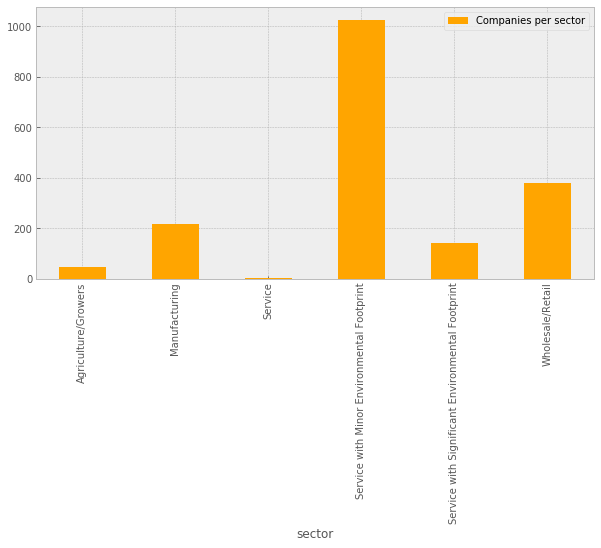

In [29]:
#Group Bcorps by sector 
by_sector=bcorp_US_cleaned.groupby('sector').nunique()['company_name']
by_sector=pd.DataFrame(by_sector)
# by_sector
plt.style.use('bmh')
by_sector.plot(kind="bar", figsize=(10,5), color="orange")
plt.legend(['Companies per sector'])
plt.savefig('graphs/companiespersector_bar.png')

FileNotFoundError: [Errno 2] No such file or directory: 'graphs/avgscorebysector-cycle_line.png'

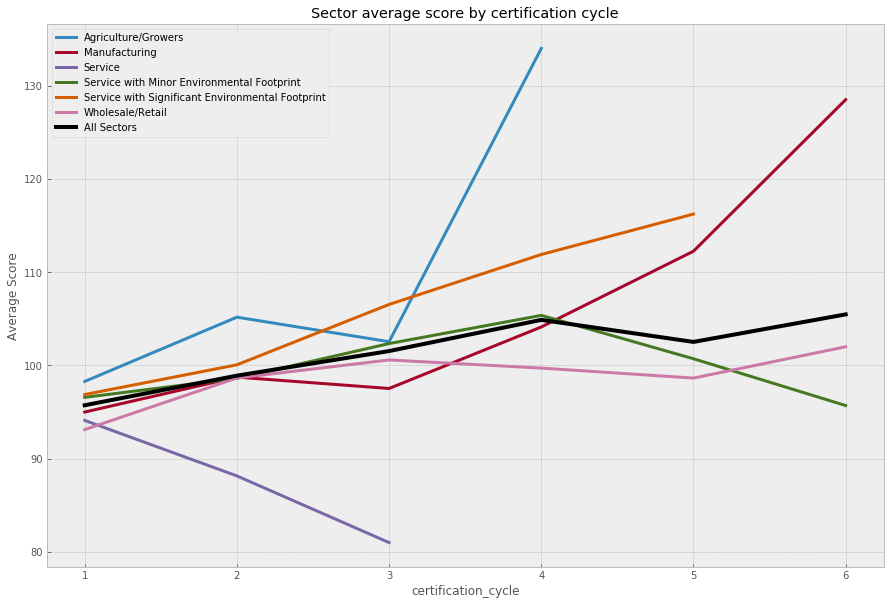

In [30]:
#Plot average score by certification cycle 
fig, ax = plt.subplots(figsize=(15,10))


# use unstack()
bcorp_US_cleaned.groupby(['certification_cycle', 'sector']).mean()['overall_score'].unstack().plot(ax=ax, markevery=1, linewidth=3)
bcorp_US_cleaned.groupby(['certification_cycle']).mean()['overall_score'].plot(label="All Sectors",
                                                                               color="black",
                                                                               title= "Sector average score by certification cycle",
                                                                               markevery=1,
                                                                               linewidth=4)
plt.ylabel("Average Score")
plt.legend()
fig.savefig('graphs/avgscorebysector-cycle_line.png')
plt.show()

#### Profits of Laureate Education (LAUR)

In [32]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64, time, ast

net_income={}
filingOrder=['0','1','2','3','4','5','6','7','8','9']
# filingOrder=['0','1','2','3','4']
info_data_dict={}
for order in filingOrder:
    
    headers = {
        # Request headers
        'Ocp-Apim-Subscription-Key': 'ebd0c77699614d7ab2573a54709ac071',
    }

    params = urllib.parse.urlencode({
        # Request parameters
    #     for i in filingOrder:
        'formType': '10-Q',    
        'filingOrder': order,
    })
    ticker='LAUR'
    
    try:
        
        conn = http.client.HTTPSConnection('services.last10k.com')
        conn.request("GET", f"/v1/company/{ticker}/cashflows?%s" % params, "{body}", headers)
        response = conn.getresponse()
        info_data = response.read().decode('utf-8')
#         info_data_dict['ProfitLoss']=info_data['data']['attributes']['result']['ProfitLoss']
        print(info_data)
        conn.close()
        info_data_dict[order]=ast.literal_eval(info_data)
    except Exception as e:
        print("[Errno {0}] {1}".format(e.errno, e.strerror))
    
    #delay the calls
    time.sleep(12)
    
    
    
    # for info in info_data:
    #         data.append(info_data['data'])
    #         attributes.append(info_data['attributes'])
    
    ####################################
    # print(data['meta'][0])
#Test code
# info_data_dict['10']['data']['attributes']['result']['ProfitLoss']
# info_data_dict['9']['data']['attributes']['filing']['period']

{"meta":{"copyright":"Copyright 2020 Last10K.com All Rights Reserverd","terms":"https://dev.last10k.com/terms"},"data":{"attributes":{"status":0,"company":{"name":"LAUREATE EDUCATION, INC.","cik":"912766","ticker":"laur"},"filing":{"name":"Consolidated Statements Of Cash Flows","accessionNumber":"0001628280-20-006772","filingDate":"2020-05-07T00:00:00","period":"2020-03-31T00:00:00","source":"10-Q","filingCount":10},"count":32,"result":{"ProfitLoss":98316000.0,"AssetImpairmentCharges":3768000.0,"GainLossOnDispositionOfAssets1":21175000.0,"ShareBasedCompensation":1984000.0,"ProvisionForDoubtfulAccounts":22912000.0,"DeferredIncomeTaxesAndTaxCredits":-248701000.0,"ForeignCurrencyTransactionGainLossUnrealized":-29720000.0,"OtherNoncashIncomeExpense":3982000.0,"IncreaseDecreaseInReceivables":-173760000.0,"IncreaseDecreaseInPrepaidDeferredExpenseAndOtherAssets":-32084000.0,"IncreaseDecreaseInAccountsPayableAndAccruedLiabilities":-64924000.0,"IncreaseDecreaseInIncomeTaxesPayableNetOfIncomeTax

{"meta":{"copyright":"Copyright 2020 Last10K.com All Rights Reserverd","terms":"https://dev.last10k.com/terms"},"data":{"attributes":{"status":0,"company":{"name":"LAUREATE EDUCATION, INC.","cik":"912766","ticker":"laur"},"filing":{"name":"Consolidated Statements Of Cash Flows","accessionNumber":"0001628280-18-013939","filingDate":"2018-11-08T00:00:00","period":"2018-09-30T00:00:00","source":"10-Q","filingCount":10},"count":35,"result":{"ProfitLoss":298814000.0,"AssetImpairmentCharges":10030000.0,"GainLossOnDispositionOfAssets1":-292999000.0,"ShareBasedCompensation":10492000.0,"ProvisionForDoubtfulAccounts":83029000.0,"DeferredIncomeTaxesAndTaxCredits":-389000.0,"ForeignCurrencyTransactionGainLossUnrealized":53731000.0,"OtherNoncashIncomeExpense":-11607000.0,"IncreaseDecreaseInReceivables":-288747000.0,"IncreaseDecreaseInPrepaidDeferredExpenseAndOtherAssets":-50919000.0,"IncreaseDecreaseInAccountsPayableAndAccruedLiabilities":-6263000.0,"IncreaseDecreaseInIncomeTaxesPayableNetOfIncomeT

{"meta":{"copyright":"Copyright 2020 Last10K.com All Rights Reserverd","terms":"https://dev.last10k.com/terms"},"data":{"attributes":{"status":0,"company":{"name":"LAUREATE EDUCATION, INC.","cik":"912766","ticker":"laur"},"filing":{"name":"Consolidated Statements Of Cash Flows","accessionNumber":"0001628280-17-008326","filingDate":"2017-08-08T00:00:00","period":"2017-06-30T00:00:00","source":"10-Q","filingCount":10},"count":39,"result":{"ProfitLoss":-3256000.0,"GainLossOnDispositionOfAssets1":1927000.0,"AmortizationOfFinancingCostsAndDiscounts":22359000.0,"ShareBasedCompensation":35337000.0,"ProvisionForDoubtfulAccounts":51439000.0,"DeferredIncomeTaxesAndTaxCredits":-3196000.0,"ForeignCurrencyTransactionGainLossUnrealized":11756000.0,"OtherNoncashIncomeExpense":-1052000.0,"IncreaseDecreaseInRestrictedCashForOperatingActivities":318000.0,"IncreaseDecreaseInReceivables":-162375000.0,"IncreaseDecreaseInPrepaidDeferredExpenseAndOtherAssets":-99019000.0,"IncreaseDecreaseInAccountsPayableAnd

In [33]:
import ast
# my_string = "{'result':'val','key2':2}"
# my_dict = ast.literal_eval(info_data)

#fill dictionary with Profit data from Laureate stock (LAUR)
net_income_0 = info_data_dict['0']['data']['attributes']['result']['ProfitLoss']
net_income_1 = info_data_dict['1']['data']['attributes']['result']['ProfitLoss']
net_income_2 = info_data_dict['2']['data']['attributes']['result']['ProfitLoss']
net_income_3 = info_data_dict['3']['data']['attributes']['result']['ProfitLoss']
net_income_4 = info_data_dict['4']['data']['attributes']['result']['ProfitLoss']
net_income_5 = info_data_dict['5']['data']['attributes']['result']['ProfitLoss']
net_income_6 = info_data_dict['6']['data']['attributes']['result']['ProfitLoss']
net_income_7 = info_data_dict['7']['data']['attributes']['result']['ProfitLoss']
net_income_8 = info_data_dict['8']['data']['attributes']['result']['ProfitLoss']
net_income_9 = info_data_dict['9']['data']['attributes']['result']['ProfitLoss']


filingPeriod_0 = info_data_dict['0']['data']['attributes']['filing']['period']
filingPeriod_1 = info_data_dict['1']['data']['attributes']['filing']['period']
filingPeriod_2 = info_data_dict['2']['data']['attributes']['filing']['period']
filingPeriod_3 = info_data_dict['3']['data']['attributes']['filing']['period']
filingPeriod_4 = info_data_dict['4']['data']['attributes']['filing']['period']
filingPeriod_5 = info_data_dict['5']['data']['attributes']['filing']['period']
filingPeriod_6 = info_data_dict['6']['data']['attributes']['filing']['period']
filingPeriod_7 = info_data_dict['7']['data']['attributes']['filing']['period']
filingPeriod_8 = info_data_dict['8']['data']['attributes']['filing']['period']
filingPeriod_9 = info_data_dict['9']['data']['attributes']['filing']['period']

net_income=[net_income_0,net_income_1,net_income_2,net_income_3,net_income_4,net_income_5,net_income_6,
           net_income_7,net_income_8,net_income_9]

# x_axis=filingPeriod
# net_income
# (filingPeriod)
filing_period = [filingPeriod_0,filingPeriod_1,filingPeriod_2,filingPeriod_3,filingPeriod_4,filingPeriod_5,filingPeriod_6,
                filingPeriod_7,filingPeriod_8,filingPeriod_9]
# filing_period = (filingPeriod[0:4])
# filing_period = int(filing_period)
# net_income
y_axis=net_income
x_axis = filing_period
# info_data_dict
# filing_period
x_axis
y_axis

[98316000.0,
 877087000.0,
 973881000.0,
 194265000.0,
 298814000.0,
 395499000.0,
 171545000.0,
 -106745000.0,
 -3256000.0,
 -120353000.0]

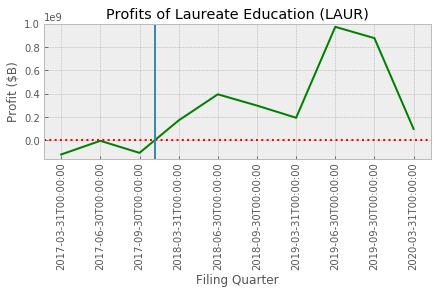

In [49]:

graph = plt.plot(x_axis, y_axis, color = 'g')
plt.ylim((-155353000,1000000000))
# plt.xlim
plt.xticks(rotation=90)
plt.gca().invert_xaxis()
# plt.xticks(bcorp_US_industry.sector, rotation=90, fontsize=12)
plt.axhline(y=0, color = 'r', linestyle='dotted')
plt.axvline(x=6.6, linestyle='-')
plt.title('Profits of Laureate Education (LAUR)')
plt.ylabel('Profit ($B)')
plt.xlabel("Filing Quarter")
plt.tight_layout(pad=.4, w_pad=.5,h_pad=1.0)
plt.savefig('laureate_profit')
# companies.head()

In [53]:
#find the impact scores for laueate education

laureate_education = bcorp_US_cleaned.loc[bcorp_US_cleaned['company_name'] == "Laureate Education"]
laureate_education = laureate_education[['overall_score','date_certified']]
laureate_education.reset_index()
# laureate_education['Company Name']='Laureate Education']
laureate_education.insert(0, 'Laureate Education',"") 
laureate_education.columns=['Laureate Education', 'Overall Score', 'Certification Date']
laureate_education

,Laureate Education,Overall Score,Certification Date
3387,,104.2,12/1/2017
3388,,95.8,10/30/2015


#### Impact Area Analysis by Sector

In [38]:
# average_score=sum(bcorp_US_industry['overall_score'])/len(bcorp_US_industry['overall_score'])
# average_score
bcorp_US_industry = bcorp_US_cleaned

bcorp_US_industry = bcorp_US_industry.filter(['company_name','date_first_certified','date_certified','industry','industry_category','industry_category','sector','assessment_year','overall_score'])
bcorp_US_industry.head()
sector_score = bcorp_US_industry.groupby('sector').sum()

sector_score = bcorp_US_industry[['sector','overall_score']]
sector_score.sum()
sector_score_mean = round(sector_score.groupby('sector').mean(),2)
sector_score_mean = sector_score_mean.rename(columns={'overall_score': "Average Overall Score"})
sector_score_max = sector_score.groupby('sector').max()
sector_score_max = sector_score_max.rename(columns={'overall_score': "Max Overall Score"})
sector_score_count=sector_score['sector'].value_counts()
# sector_score_count.rename(columns={'sector': "Number of Companies"})
# (sector_score_max)
# (sector_score_mean)
sector_score_analysis=pd.concat([sector_score_mean,sector_score_max,sector_score_count], axis=1)
sector_score_analysis=sector_score_analysis.rename(columns={'sector': "Number of Companies"})

sector_score_analysis.to_csv('Sector_Score_Analysis.csv')
sector_score_analysis



,Average Overall Score,Max Overall Score,Number of Companies
Agriculture/Growers,101.26,148.5,80
Manufacturing,97.05,177.8,417
Service,90.53,107.0,7
Service with Minor Environmental Footprint,98.38,176.0,1931
Service with Significant Environmental Footprint,99.77,184.0,259
Wholesale/Retail,95.92,166.5,696


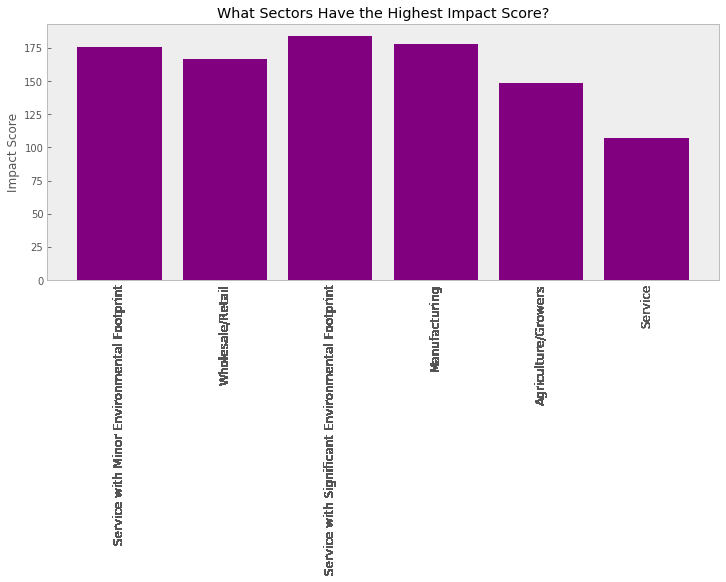

In [39]:
# what sectors have the highest impact score
# industry = bcorp_US_industry.groupby('industry')
# industry.count()
x=bcorp_US_industry.sector
y=bcorp_US_industry.overall_score
plt.figure(figsize=(10,8))
graph = plt.bar(x,y, color='purple')
plt.xticks(bcorp_US_industry.sector, rotation=90, fontsize=12)
plt.title("What Sectors Have the Highest Impact Score?")
# plt.xlabel()
plt.ylabel("Impact Score")
plt.grid()
plt.plot()
plt.tight_layout(pad=.4, w_pad=.5,h_pad=1.0)
# plt.savefig('sector_impact_score')
